/var/folders/62/5z3v0yxd16j2h07xpypgxxpw0000gn/T/ipykernel_28413/3888389931.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


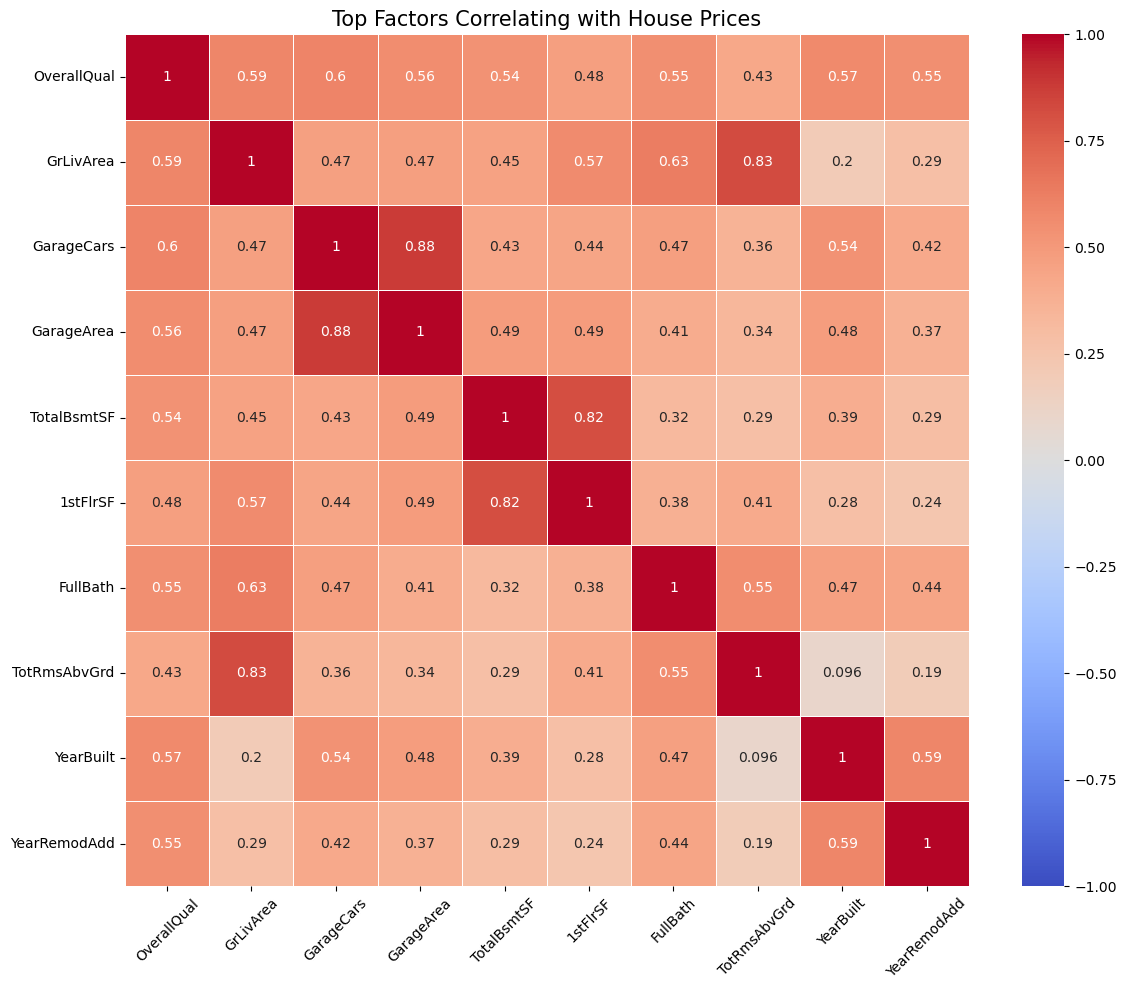

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
housing_data = pd.read_csv('housing.csv')

# 1. Key factors that influence house prices the most
# Compute the correlation matrix
correlation_matrix = housing_data.corr()

# Get the top 10 factors that influence house prices the most
price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False).head(11)  # including 'SalePrice' itself

# Drop 'SalePrice' from the list to get other factors
top_factors = price_correlation.index[1:]

# Filter the correlation matrix for the top factors
top_corr_matrix = correlation_matrix.loc[top_factors, top_factors]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Customizing the plot
plt.title('Top Factors Correlating with House Prices', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

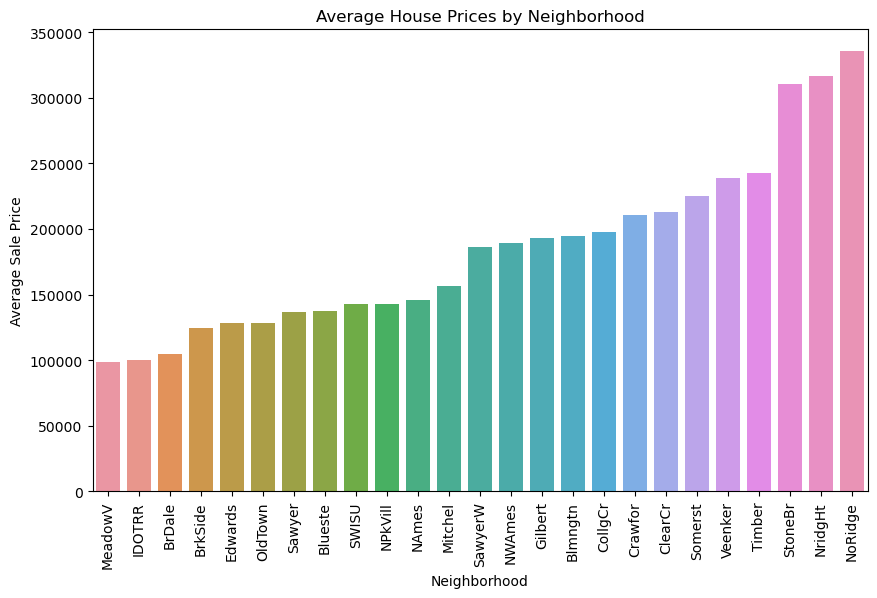

In [12]:
# 2. House prices by neighborhood
neighborhood_prices = housing_data.groupby('Neighborhood')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values)
plt.xticks(rotation=90)
plt.title('Average House Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.show()


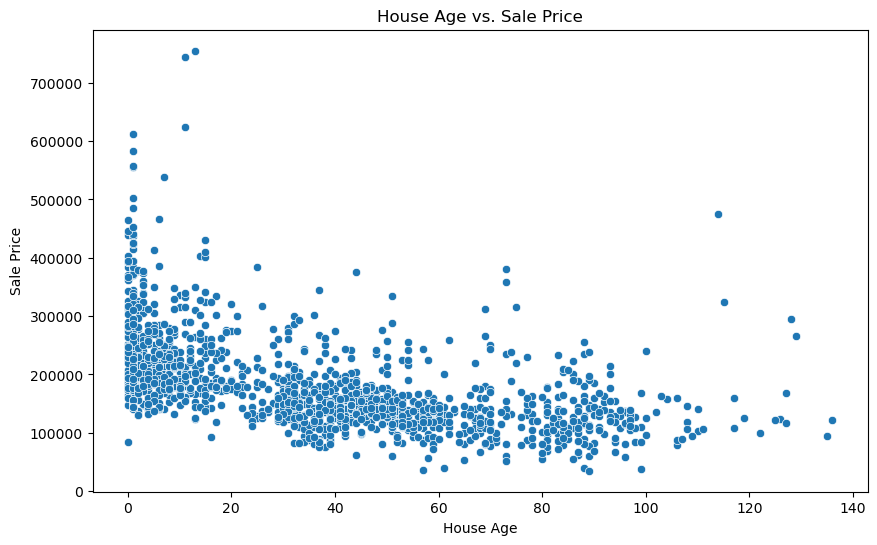

In [13]:
# 3. Relationship between the age of a house and its price
housing_data['HouseAge'] = housing_data['YrSold'] - housing_data['YearBuilt']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['HouseAge'], y=housing_data['SalePrice'])
plt.title('House Age vs. Sale Price')
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.show()


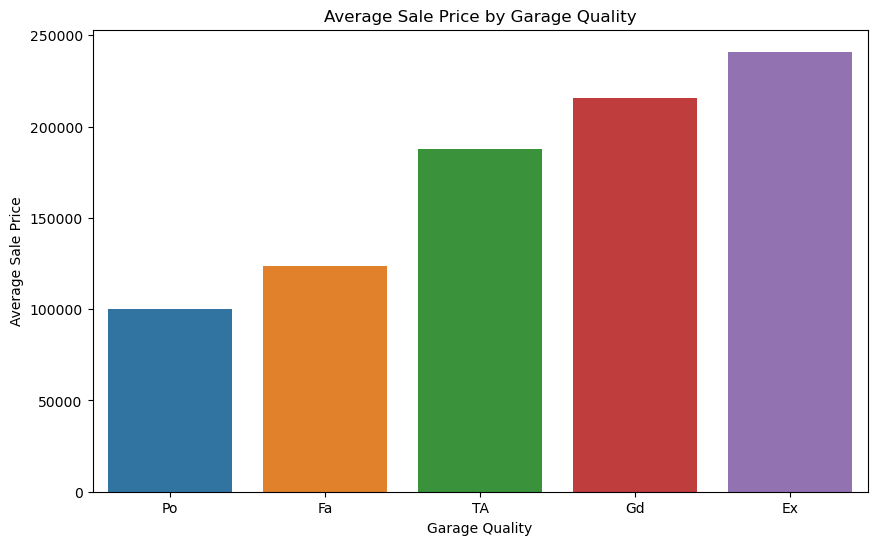

In [14]:
# 4. Impact of garage presence and quality on house prices
garage_data = housing_data[['GarageCars', 'GarageArea', 'GarageQual', 'SalePrice']]
garage_prices = garage_data.groupby('GarageQual')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=garage_prices.index, y=garage_prices.values)
plt.title('Average Sale Price by Garage Quality')
plt.xlabel('Garage Quality')
plt.ylabel('Average Sale Price')
plt.show()

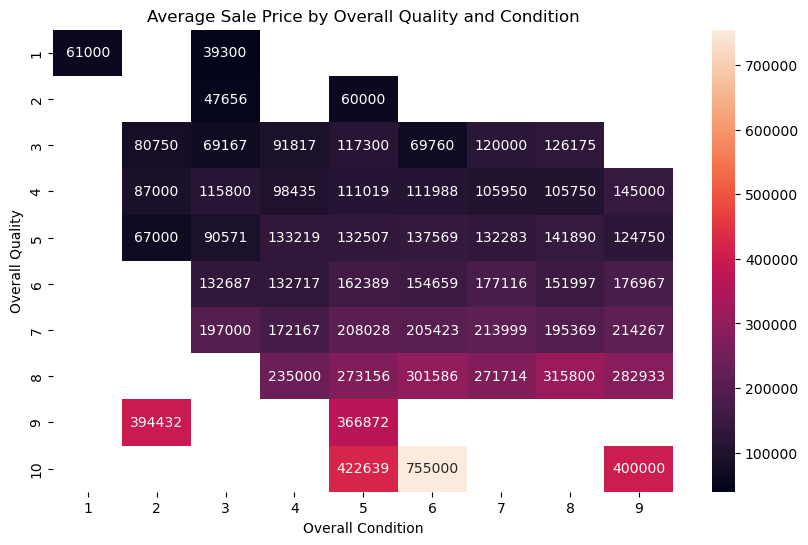

In [15]:
# 5. Effect of overall condition and quality on house prices
quality_condition_data = housing_data[['OverallQual', 'OverallCond', 'SalePrice']]
quality_condition_prices = quality_condition_data.groupby(['OverallQual', 'OverallCond'])['SalePrice'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(quality_condition_prices, annot=True, fmt=".0f")
plt.title('Average Sale Price by Overall Quality and Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Overall Quality')
plt.show()

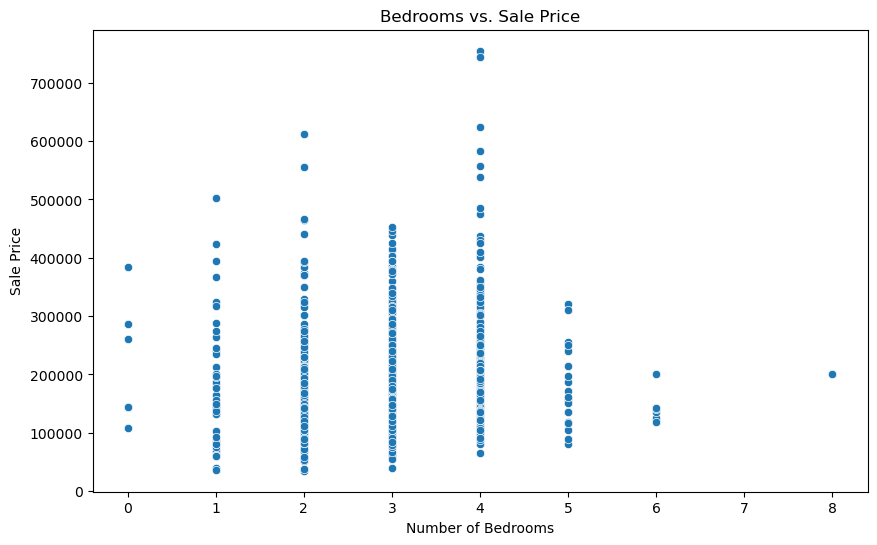

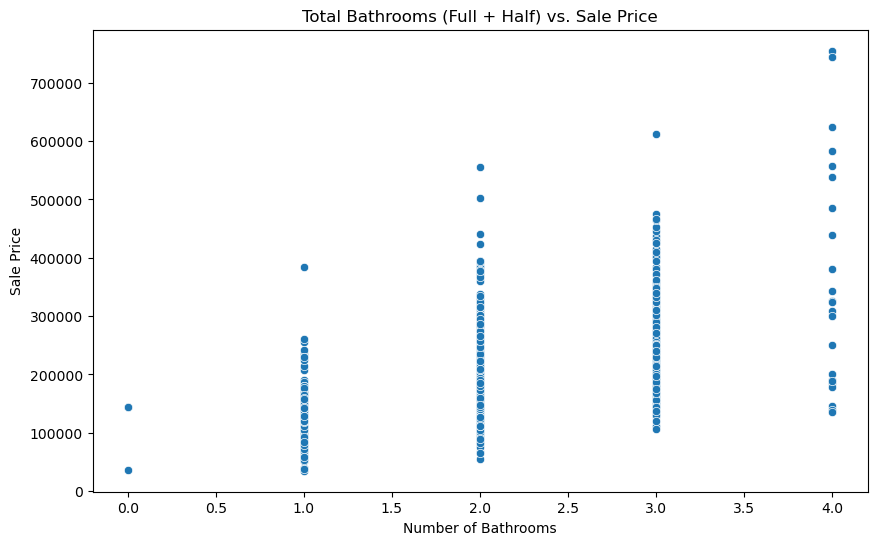

In [17]:
# 6. Correlation of bedrooms and bathrooms with house prices
bed_bath_prices = housing_data[['BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bed_bath_prices['BedroomAbvGr'], y=bed_bath_prices['SalePrice'])
plt.title('Bedrooms vs. Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=bed_bath_prices['FullBath'] + bed_bath_prices['HalfBath'], y=bed_bath_prices['SalePrice'])
plt.title('Total Bathrooms (Full + Half) vs. Sale Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price')
plt.show()

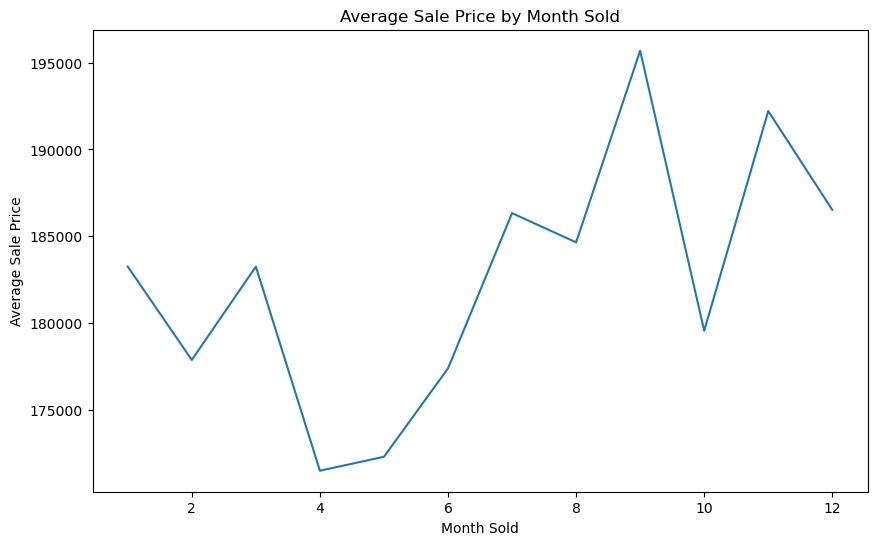

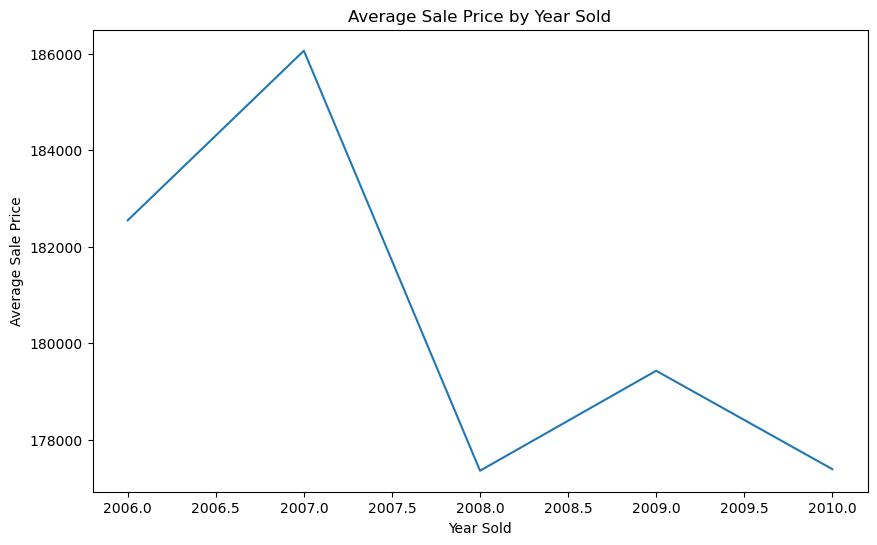

In [18]:
# 7. Trends in house sales over different months and years
monthly_sales = housing_data.groupby('MoSold')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Average Sale Price by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Average Sale Price')
plt.show()

yearly_sales = housing_data.groupby('YrSold')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Average Sale Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()

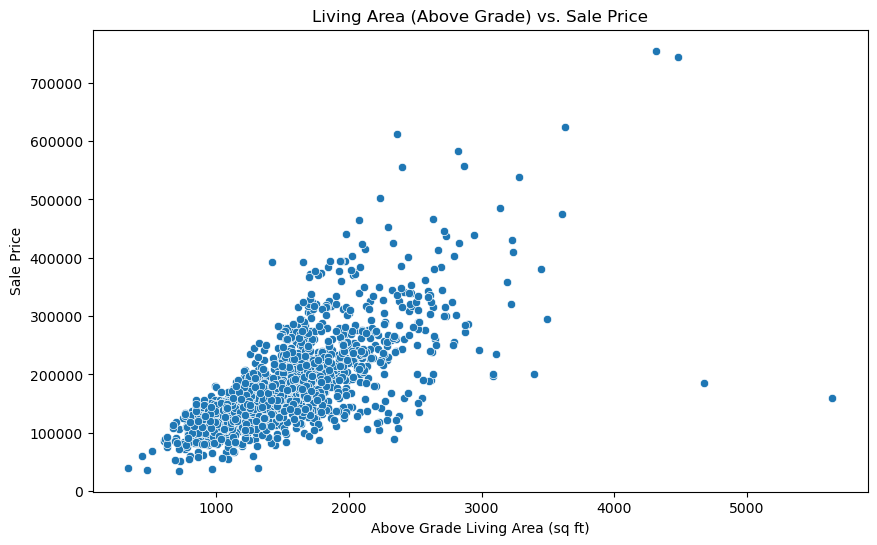

In [19]:
# 8. Effect of living area size on house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['GrLivArea'], y=housing_data['SalePrice'])
plt.title('Living Area (Above Grade) vs. Sale Price')
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

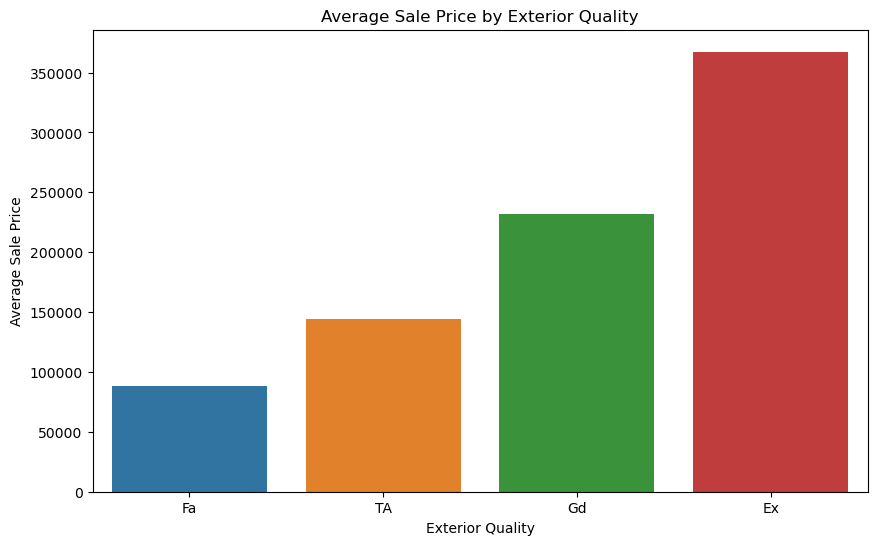

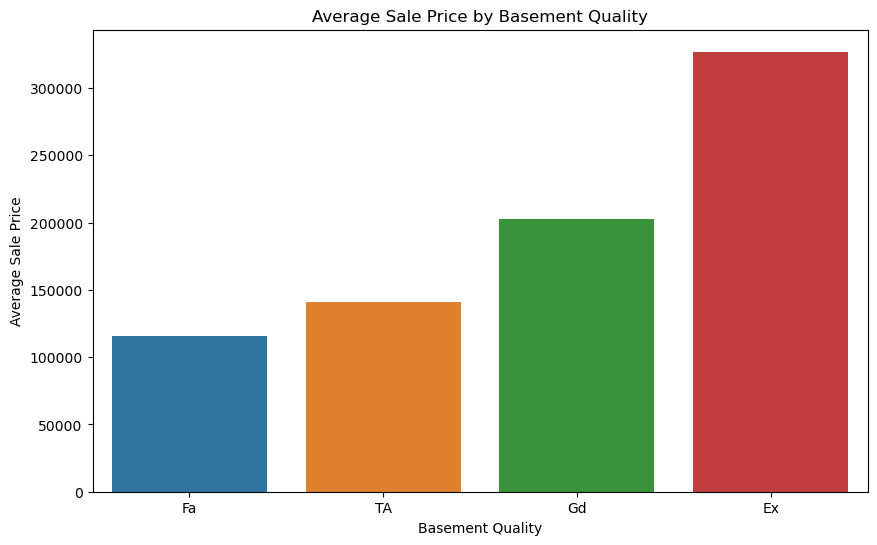

In [20]:
# 9. Impact of exterior and basement quality on house prices
exterior_quality_prices = housing_data.groupby('ExterQual')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=exterior_quality_prices.index, y=exterior_quality_prices.values)
plt.title('Average Sale Price by Exterior Quality')
plt.xlabel('Exterior Quality')
plt.ylabel('Average Sale Price')
plt.show()

basement_quality_prices = housing_data.groupby('BsmtQual')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=basement_quality_prices.index, y=basement_quality_prices.values)
plt.title('Average Sale Price by Basement Quality')
plt.xlabel('Basement Quality')
plt.ylabel('Average Sale Price')
plt.show()

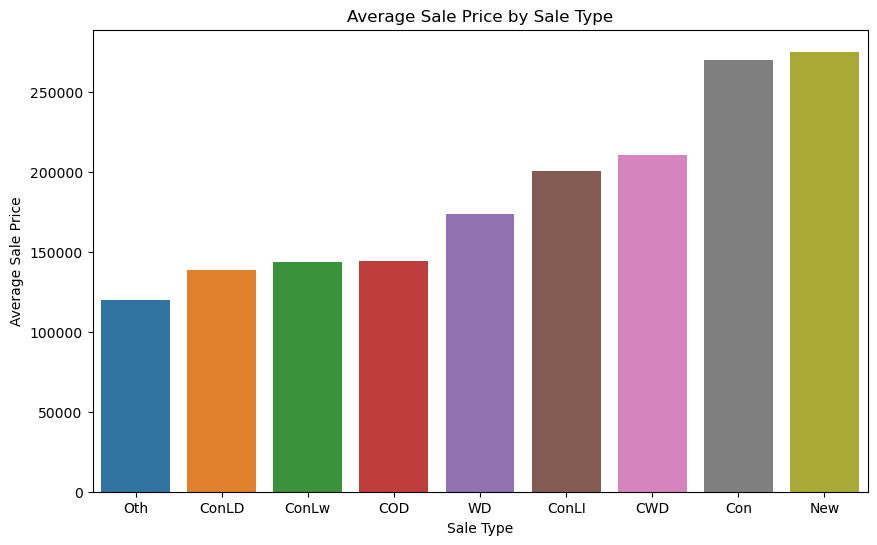

In [22]:
# 10. Effect of sale type on house prices
sale_type_prices = housing_data.groupby('SaleType')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=sale_type_prices.index, y=sale_type_prices.values)
plt.title('Average Sale Price by Sale Type')
plt.xlabel('Sale Type')
plt.ylabel('Average Sale Price')
plt.show()

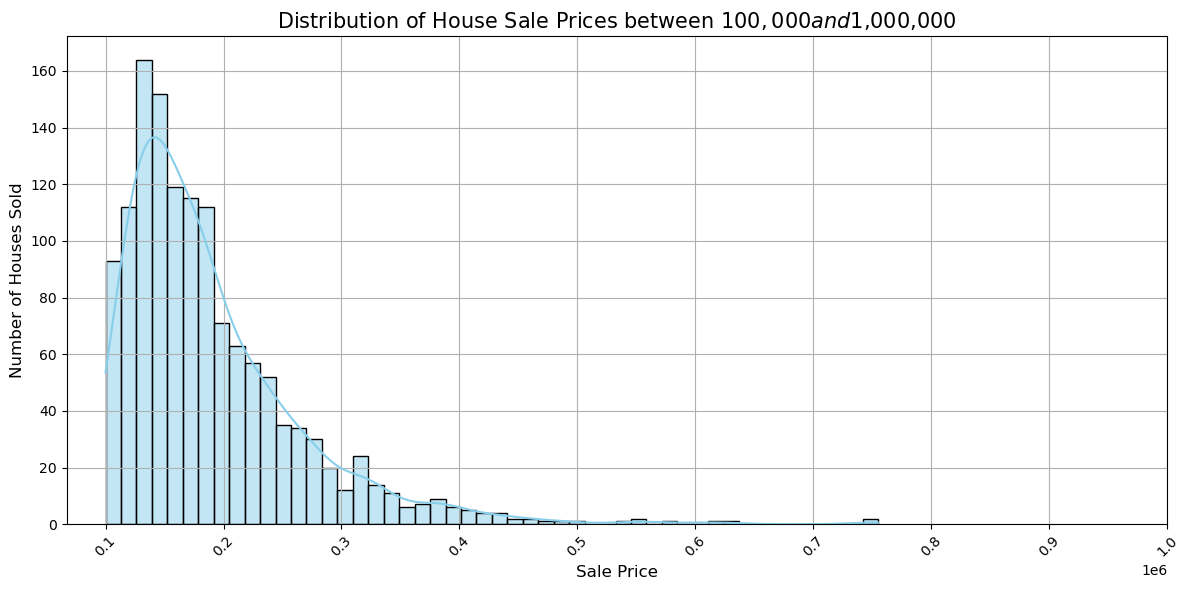

In [24]:

#11 Filter the data for houses sold between $100,000 and $1,000,000
filtered_data = housing_data[(housing_data['SalePrice'] >= 100000) & (housing_data['SalePrice'] <= 1000000)]

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['SalePrice'], bins=50, kde=True, color='skyblue')

# Customizing the plot
plt.title('Distribution of House Sale Prices between $100,000 and $1,000,000', fontsize=15)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Number of Houses Sold', fontsize=12)
plt.grid(True)
plt.xticks(range(100000, 1100000, 100000), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()